# Exploratory Data Analysis (EDA)
En este notebook se realiza un Análisis Exploratorio de Datos (EDA) sobre el sector de telecomunicaciones en Argentina. 

Los datos fueron obtenidos del ENACOM y contienen información sobre accesos a internet, tecnologías utilizadas, velocidad de conexión y penetración en la población y hogares. El objetivo es identificar patrones y comportamientos en el sector.

Se utilizan hojas del dataset 'Internet?, se realiza previamente el ETL de cada hoja y se guardan en archivos csv.

Se eligieron las hojas de acuerdo a la utilidad de los datos para al analisis de areas clave.

1. El Análisis se divide en las siguientes áreas clave:

1.1 Penetración del Servicio
Objetivo: Evaluar qué tan extendido está el servicio de internet en la población y en los hogares.
Hojas relevantes:
- Penetración-poblacion
- Penetracion-hogares
- Penetracion-totales

Preguntas clave:
¿Qué porcentaje de la población tiene acceso a internet en cada provincia?
¿Cómo varía la penetración de internet en los hogares según la región?
¿Cuáles son las tendencias en la penetración total a lo largo del tiempo?


1.2 Calidad y Velocidad del Servicio
Objetivo: Identificar las velocidades promedio y su distribución entre provincias.
Hojas relevantes:
- Velocidad_sin_Rangos
- Velocidad % por prov
- Totales VMD
- Accesos por rangos
- Totales Accesos por rango

Preguntas clave:
¿Qué velocidades son más comunes y cómo se distribuyen geográficamente?
¿Cuál es la velocidad promedio de descarga en cada región?
¿Existen disparidades significativas en la calidad del servicio entre provincias?


1.3 Tecnologías de Conexión
Objetivo: Analizar las tecnologías dominantes y su evolución.
Hojas relevantes:
- Accesos_tecnologia_localidad
- Totales Accesos Por Tecnología
- Accesos Por Tecnología

Preguntas clave:
¿Qué tecnologías de conexión son las más utilizadas?
¿Cómo ha cambiado el uso de tecnologías como fibra óptica o ADSL a lo largo del tiempo?
¿Qué provincias tienen mayor adopción de tecnologías modernas?


1.4 Cobertura y Localidades
Objetivo: Identificar disparidades en accesos entre localidades.
Hojas relevantes:
- Acc_vel_loc_sinrangos
- Accesos_tecnologia_localidad

Preguntas clave:
¿Qué localidades tienen menos acceso a internet?
¿Cómo varían los accesos según la tecnología en localidades pequeñas frente a las grandes?


1.5 Análisis Financiero
Objetivo: Evaluar los ingresos generados por los servicios de internet.
Hojas relevantes:
- Ingresos

Preguntas clave:
¿Cómo han evolucionado los ingresos generados por los servicios de internet?
¿Existe una correlación entre ingresos y penetración o calidad del servicio?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Análisis:

Comenzaremos con el EDA para realizar el analisis del area clave:   

# 1.1 Penetración del Servicio

Objetivo: Evaluar qué tan extendido está el servicio de internet en la población y en los hogares.
Hojas relevantes:
- Penetración-poblacion
- Penetracion-hogares
- Penetracion-totales

Preguntas clave:
¿Qué porcentaje de la población tiene acceso a internet en cada provincia?
¿Cómo varía la penetración de internet en los hogares según la región?
¿Cuáles son las tendencias en la penetración total a lo largo del tiempo?

# Carga de Datos y Exploración Inicial

In [2]:
# Carga de las hojas relevantes
penetracion_poblacion = pd.read_csv("Penetracion_poblacion_limpio.csv")
penetracion_hogares = pd.read_csv("Penetracion_hogares_limpio.csv")
penetracion_totales = pd.read_csv("Penetracion_totales_limpio.csv")

# Vista preliminar
print(penetracion_poblacion.head())
print(penetracion_hogares.head())
print(penetracion_totales.head())

# Información general y valores faltantes
print(penetracion_poblacion.info())
print(penetracion_hogares.info())
print(penetracion_totales.info())


    Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          2     Buenos Aires                     27.43
1  2024          2  Capital Federal                     47.44
2  2024          2        Catamarca                     17.50
3  2024          2            Chaco                     11.78
4  2024          2           Chubut                     26.46
    Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          2     Buenos Aires                         79.84
1  2024          2  Capital Federal                        116.37
2  2024          2        Catamarca                         68.81
3  2024          2            Chaco                         44.06
4  2024          2           Chubut                         86.33
    Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2024          2                         78.13                     24.57   
1  2024          1                         78.89                     24.79  

In [3]:
# Verificar valores únicos en columnas clave
print(penetracion_poblacion['Provincia'].unique())
print(penetracion_totales['Periodo'].unique())

# Descripción estadística
print(penetracion_poblacion.describe())
print(penetracion_hogares.describe())
print(penetracion_totales.describe())

['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']
['Abr-Jun 2024' 'Ene-Mar 2024' 'Oct-Dic 2023' 'Jul-Sept 2023'
 'Abr-Jun 2023' 'Ene-Mar 2023' 'Oct-Dic 2022' 'Jul-Sept 2022'
 'Abr-Jun 2022' 'Ene-Mar 2022' 'Oct-Dic 2021' 'Jul-Sept 2021'
 'Abr-Jun 2021' 'Ene-Mar 2021' 'Oct-Dic 2020' 'Jul-Sept 2020'
 'Abr-Jun 2020' 'Ene-Mar 2020' 'Oct-Dic 2019' 'Jul-Sept 2019'
 'Abr-Jun 2019' 'Ene-Mar 2019' 'Oct-Dic 2018' 'Jul-Sept 2018'
 'Abr-Jun 2018' 'Ene-Mar 2018' 'Oct-Dic 2017' 'Jul-Sept 2017'
 'Abr-Jun 2017' 'Ene-Mar 2017' 'Oct-Dic 2016' 'Jul-Sept 2016'
 'Abr-Jun 2016' 'Ene-Mar 2016' 'Oct-Dic 2015' 'Jul-Sept 2015'
 'Abr-Jun 2015' 'Ene-Mar 2015' 'Oct-Dic 2014' 'Jul-Sept 2014'
 'Abr-Jun 2014' 'Ene-Mar 2014']
               Año    Trimestre  Accesos por cada 100 ha

Análisis de Datos Presentados:
Provincias:
Las provincias incluidas en los datos son un conjunto representativo de Argentina, como Buenos Aires, Capital Federal, Córdoba, Santa Fe, entre otras, sumando un total de 24 provincias.

Periodos:
Los periodos están distribuidos de manera trimestral, abarcando desde el primer trimestre de 2014 hasta el segundo trimestre de 2024, lo que permite analizar una década de evolución en los accesos por cada 100 habitantes y por cada 100 hogares.

Estadísticas Generales:
Datos de Accesos por cada 100 habitantes:
Promedio: 15.73 accesos por cada 100 habitantes.
Desviación estándar: 9.24, indicando una dispersión significativa.
Rango:
Mínimo: 2.72 (probablemente en regiones con menor conectividad o al inicio de los periodos).
Máximo: 52.23 (en áreas más urbanizadas y en periodos recientes).
Datos de Accesos por cada 100 hogares:
Promedio: 52.79 accesos por cada 100 hogares.
Desviación estándar: 24.13, con un rango amplio.
Rango:
Mínimo: 9.51 (corresponde a periodos más antiguos o zonas rurales).
Máximo: 124.06 (en áreas urbanas con alta densidad de conectividad).
Estadísticas por Trimestre (42 observaciones):
Estos datos sintetizan la evolución por trimestres:

Accesos por cada 100 hogares:
Promedio: 63.20, mayor que el promedio general (refleja una tendencia al alza).
Mínimo: 49.54, con un crecimiento hasta 78.89 (en trimestres recientes).
Accesos por cada 100 habitantes:
Promedio: 19.57, más alto que el promedio general, lo que podría indicar una mejora consistente.
Rango: De 15.05 a 24.79, con una menor dispersión.
Observaciones:
Crecimiento Sostenido: Los datos muestran un incremento constante en la conectividad tanto por hogar como por habitante.
Brechas Geográficas: Las estadísticas sugieren variaciones significativas entre provincias urbanas y rurales.
Tendencias: Es necesario explorar visualizaciones para identificar patrones anuales o trimestrales.

# Análisis: Penetración de Internet en la Población por Provincia

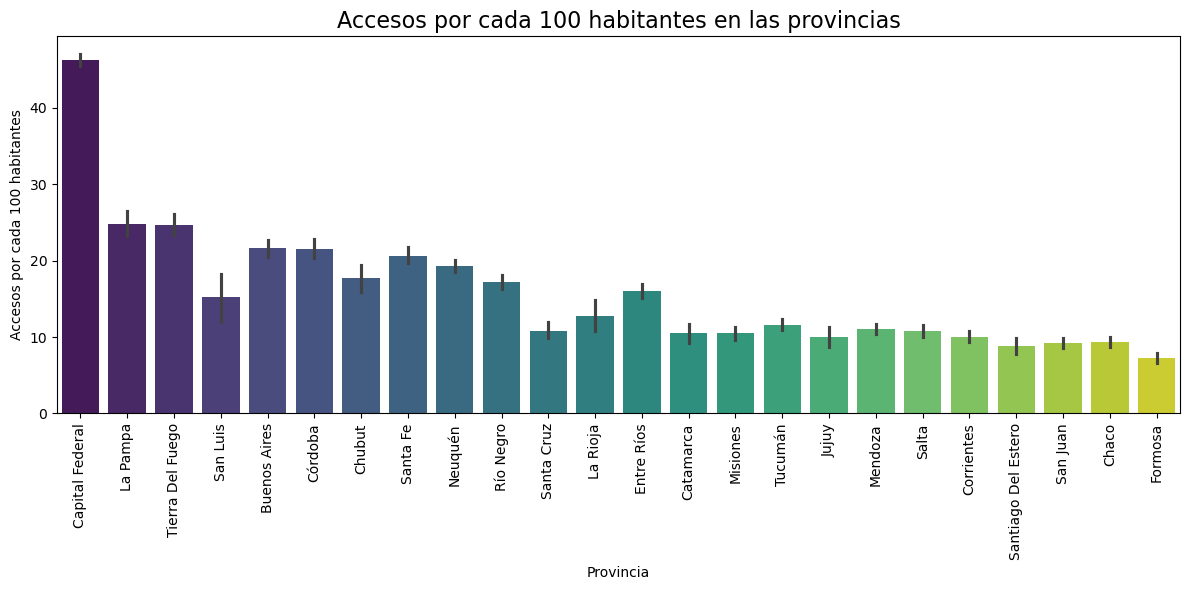

In [5]:
# Filtrar columnas clave
penetracion_poblacion_filtered = penetracion_poblacion[["Provincia", "Accesos por cada 100 hab"]]

# Ordenar para visualización
penetracion_poblacion_sorted = penetracion_poblacion_filtered.sort_values(by="Accesos por cada 100 hab", ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=penetracion_poblacion_sorted,
    x="Provincia",
    y="Accesos por cada 100 hab",
    palette="viridis",
    hue="Provincia",
    dodge=False,  # Asegúrate de que no se desplace
    legend=False  # Oculta la leyenda
)

plt.xticks(rotation=90)
plt.title("Accesos por cada 100 habitantes en las provincias", fontsize=16)
plt.ylabel("Accesos por cada 100 habitantes")
plt.xlabel("Provincia")
plt.tight_layout()
plt.show()

Conclusiones:

Provincias con mayor penetración:
Capital Federal destaca con la mayor cantidad de accesos por cada 100 habitantes, siendo considerablemente superior al resto de las provincias.
La Pampa y Tierra del Fuego también presentan niveles altos de penetración, aunque están por debajo de Capital Federal.

Provincias con menor penetración:
Formosa tiene la menor cantidad de accesos por cada 100 habitantes.
Provincias como Chaco, San Juan, y Santiago del Estero también muestran bajos niveles de penetración en comparación con otras provincias.

Brecha significativa entre regiones:
Existe una brecha clara entre las provincias con alta penetración (Capital Federal, La Pampa, Tierra del Fuego) y aquellas con baja penetración (Formosa, Chaco, San Juan).
Esta diferencia sugiere disparidades en el acceso a los servicios digitales, posiblemente relacionadas con factores como infraestructura tecnológica, nivel de urbanización y densidad poblacional.
La brecha es más pronunciada en provincias con características rurales o alejadas de los grandes centros urbanos.

Tendencias generales:
Las provincias del centro y sur del país (como Buenos Aires, Córdoba y Santa Fe) presentan penetraciones intermedias-altas, posiblemente debido a un mejor acceso a infraestructura tecnológica.
Las provincias del norte (como Formosa, Chaco y Santiago del Estero) tienden a tener menor penetración, indicando desigualdad en la distribución de recursos tecnológicos.

Recomendaciones:
Fomentar inversión en infraestructura tecnológica en regiones con menor penetración, como las del norte, para reducir las brechas digitales.
Analizar más profundamente los factores que impulsan la alta penetración en Capital Federal y provincias del sur, para replicar estrategias en otras regiones.
Diseñar políticas públicas que promuevan la igualdad de acceso, priorizando provincias con indicadores más bajos.

# Análisis: Penetración de Internet en los Hogares por Región

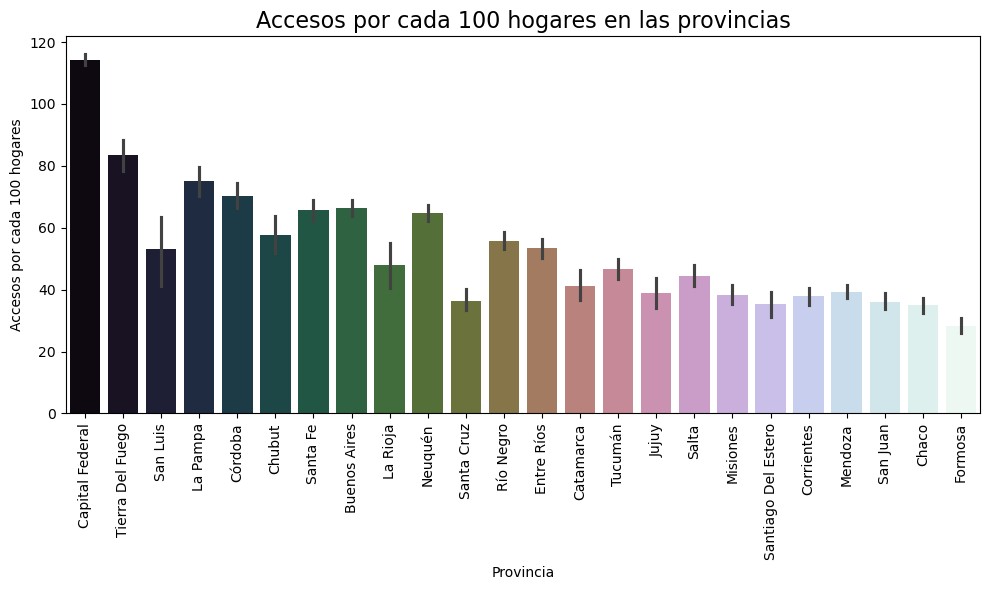

In [7]:
# Ordenar para visualización
penetracion_hogares_sorted = penetracion_hogares.sort_values(by="Accesos por cada 100 hogares", ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=penetracion_hogares_sorted, 
            x="Provincia", 
            y="Accesos por cada 100 hogares", 
            palette="cubehelix", 
            hue="Provincia", 
            legend=False)

plt.xticks(rotation=90)
plt.title("Accesos por cada 100 hogares en las provincias", fontsize=16)
plt.ylabel("Accesos por cada 100 hogares")
plt.xlabel("Provincia")
plt.tight_layout()
plt.show()

Conclusiones:

Provincias con mayor acceso por hogar:
Capital Federal es nuevamente la región con mayor acceso por cada 100 hogares, superando las 100 conexiones por hogar en promedio. Esto puede estar relacionado con su alta urbanización y mejores infraestructuras tecnológicas.
Tierra del Fuego, San Luis y La Pampa siguen en los primeros puestos, mostrando también un alto nivel de penetración tecnológica.

Provincias con menor acceso por hogar:
Formosa, Chaco y San Juan tienen los niveles más bajos de accesos por cada 100 hogares, lo que refleja una brecha significativa en comparación con las provincias líderes.

Comparativa con el análisis de la población:
Capital Federal lidera tanto en accesos por cada 100 habitantes como en accesos por cada 100 hogares, destacándose como un caso de alta penetración tecnológica.
Las provincias como Tierra del Fuego, San Luis y La Pampa mantienen una buena posición en ambos análisis, lo que sugiere una distribución equitativa de accesos tanto a nivel individual como familiar.
Provincias como Formosa y Chaco, que están al final en ambos gráficos, muestran un patrón claro de baja conectividad, tanto por habitante como por hogar, indicando una necesidad de inversión en infraestructura digital.
Mendoza, aunque está en una posición intermedia en accesos por cada 100 habitantes, desciende en el ranking al analizar accesos por cada 100 hogares, lo que podría indicar mayor densidad poblacional y menos recursos digitales por hogar.

Brecha tecnológica:
El análisis evidencia una brecha tecnológica significativa entre regiones. Las provincias con menor urbanización o recursos económicos suelen tener niveles más bajos de conectividad, mientras que áreas más urbanizadas como Capital Federal y Tierra del Fuego concentran mejores resultados.

Este análisis puede ser clave para priorizar políticas públicas de conectividad en las regiones más desfavorecidas.

# Analisis Tendencias de Penetración Total a lo Largo del Tiempo

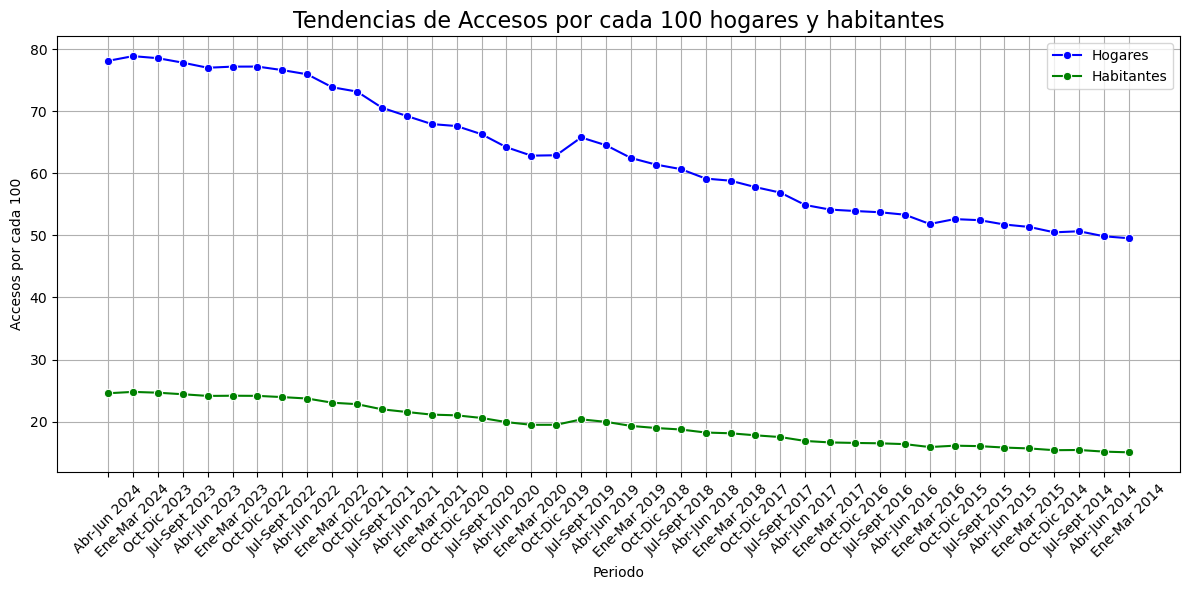

In [8]:
# Gráfico de línea para tendencias
plt.figure(figsize=(12, 6))
sns.lineplot(data=penetracion_totales, x="Periodo", y="Accesos por cada 100 hogares", marker="o", label="Hogares", color="blue")
sns.lineplot(data=penetracion_totales, x="Periodo", y="Accesos por cada 100 hab", marker="o", label="Habitantes", color="green")
plt.title("Tendencias de Accesos por cada 100 hogares y habitantes", fontsize=16)
plt.ylabel("Accesos por cada 100")
plt.xlabel("Periodo")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Conclusiones:(considerando que el eje de Periodo muestra los años de mayor a menor)

1. Identificación de tendencias a largo plazo:
Tanto los accesos por cada 100 hogares como por cada 100 habitantes presentan una disminución constante hacia años más antiguos.
La línea azul (accesos por hogar) comienza con valores más altos (cercanos a 80) en los períodos más recientes (2024) y disminuye progresivamente hasta llegar a aproximadamente 50 en los períodos más antiguos (2014).
La línea verde (accesos por habitante) sigue una tendencia similar, comenzando cerca de 30 en 2024 y bajando a menos de 20 en los años más antiguos.

Análisis de patrones recientes:
Los años más recientes muestran valores más elevados, lo que sugiere que, a pesar de las fluctuaciones, en las últimas décadas se logró un nivel de acceso relativamente alto en comparación con los años anteriores.
La pendiente más pronunciada en ciertos períodos, como entre 2019 y 2021, puede reflejar eventos importantes (por ejemplo, crisis económicas o avances tecnológicos) que aceleraron la pérdida de accesos.

2. Comparación entre hogares y población:
Brecha constante entre hogares y población:
En todos los períodos, los accesos por cada 100 hogares (línea azul) son significativamente mayores que los accesos por cada 100 habitantes (línea verde). Esto indica que, aunque los hogares mantienen conectividad, la penetración entre personas individuales es limitada.
Convergencia parcial en años más antiguos:
En los períodos más antiguos (2014-2016), la diferencia entre ambos indicadores tiende a reducirse, aunque esto podría ser atribuido a un nivel bajo de penetración generalizado en ese entonces.
Mayor impacto en hogares recientes:
En los períodos más recientes, se observa una mayor proporción de hogares con acceso, aunque no necesariamente se traduce en un mayor acceso individual.

Implicaciones del eje invertido:
Enfoque en mejoras recientes:
La disposición del eje permite identificar claramente cómo los accesos han mejorado en años recientes y cómo estos avances aún no se distribuyen equitativamente entre población y hogares.

Priorización de políticas públicas:
Con el análisis de períodos recientes primero, queda más claro dónde concentrar esfuerzos (es decir, en aumentar la accesibilidad individual, que tiene valores más bajos).
Perspectiva histórica más clara:
Al observar la tendencia desde el presente hacia el pasado, se destaca cómo la conectividad ha avanzado significativamente en comparación con períodos más antiguos, aunque con desafíos pendientes en términos de sostenibilidad y equidad.

# Verificación de Valores Faltantes y Registros Duplicados

In [9]:
# Verificar valores faltantes
print(penetracion_poblacion.isnull().sum())
print(penetracion_hogares.isnull().sum())
print(penetracion_totales.isnull().sum())

# Verificar registros duplicados
print(penetracion_poblacion.duplicated().sum())
print(penetracion_hogares.duplicated().sum())
print(penetracion_totales.duplicated().sum())

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64
Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64
Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64
0
0
0


A continuacion se presenta el analisis del area clave:

# 1.2 Calidad y Velocidad del Servicio

Objetivo: Identificar las velocidades promedio y su distribución entre provincias.

Hojas relevantes:
- Velocidad_sin_Rangos
- Velocidad % por prov
- Totales VMD
- Accesos por rangos
- Totales Accesos por rango

Preguntas clave:
¿Qué velocidades son más comunes y cómo se distribuyen geográficamente?
¿Cuál es la velocidad promedio de descarga en cada región?
¿Existen disparidades significativas en la calidad del servicio entre provincias?

# Cargar los datos

In [3]:
# Configuración de estilo
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar los datos CSV (ajusta las rutas según corresponda)
velocidad_sin_rangos = pd.read_csv("velocidad_sin_rangos_limpio.csv")
velocidad_por_prov = pd.read_csv("Velocidad_por_provincia_limpio.csv")
totales_vmd = pd.read_csv("Totales_VMD_limpio.csv")
accesos_por_rangos = pd.read_csv("accesos_por_rangos_limpio.csv")
totales_accesos_por_rango = pd.read_csv("Totales_Accesos_por_rango_limpio.csv")

# Verificar que los datos se cargaron correctamente
print("Velocidad sin rangos:")
print(velocidad_sin_rangos.head())
print("\nVelocidad por provincia:")
print(velocidad_por_prov.head())


Velocidad sin rangos:
   anio  trimestre        provincia  velocidad_promedio  total_accesos
0  2017          4     Buenos Aires           29.770514        3188332
1  2017          4  Capital Federal           37.020343        1584238
2  2017          4        Catamarca           20.764000          29558
3  2017          4            Chaco           24.324696          96471
4  2017          4           Chubut           11.413250          93432

Velocidad por provincia:
    Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          2     Buenos Aires                  157.41
1  2024          2  Capital Federal                  233.01
2  2024          2        Catamarca                   97.38
3  2024          2            Chaco                  107.76
4  2024          2           Chubut                   21.67


# Análisis de la distribución de velocidades
Analizaremos los datos de la columna velocidad_promedio en la tabla Velocidad sin rangos.

Estadísticas descriptivas de Velocidad Promedio:
count    648.000000
mean      61.300131
std       43.260417
min        3.463111
25%       24.536652
50%       44.638458
75%      100.804370
max      170.785824
Name: velocidad_promedio, dtype: float64


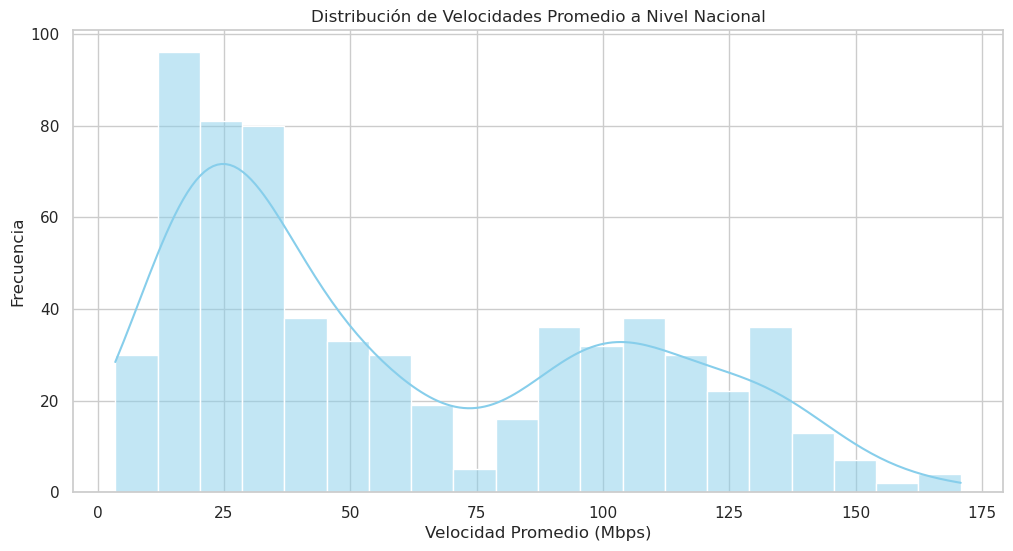

In [4]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de Velocidad Promedio:")
print(velocidad_sin_rangos["velocidad_promedio"].describe())

# Histograma para analizar la distribución de las velocidades promedio
plt.figure()
sns.histplot(velocidad_sin_rangos["velocidad_promedio"], bins=20, kde=True, color="skyblue")
plt.title("Distribución de Velocidades Promedio a Nivel Nacional")
plt.xlabel("Velocidad Promedio (Mbps)")
plt.ylabel("Frecuencia")
plt.show()


Interpretación de las estadísticas descriptivas:

count (648): Hay un total de 648 observaciones para velocidad_promedio. Esto implica que se analizaron múltiples combinaciones de provincia, año y trimestre.

mean (61.30 Mbps): En promedio, la velocidad de conexión a internet a nivel nacional es de 61.3 Mbps. Este valor puede considerarse una referencia para comparaciones regionales o temporales.

std (43.26 Mbps): La desviación estándar indica una variabilidad significativa en las velocidades promedio, lo que sugiere disparidades notables entre provincias.

min (3.46 Mbps): La velocidad más baja registrada es de apenas 3.46 Mbps, indicando que en algunas regiones el servicio es extremadamente limitado.

max (170.78 Mbps): La velocidad máxima alcanzada es 170.78 Mbps, lo que podría reflejar una región con alta infraestructura tecnológica.

Cuartiles:
25% (24.54 Mbps): El 25% de las observaciones tiene velocidades promedio inferiores a 24.54 Mbps.
50% (44.64 Mbps): La mediana está en 44.64 Mbps, lo que significa que la mitad de las provincias tienen velocidades por debajo de este valor.
75% (100.80 Mbps): El 25% superior tiene velocidades promedio mayores a 100.80 Mbps.

Conclusiones:

Disparidad en la calidad del servicio: La alta desviación estándar y el rango amplio (de 3.46 a 170.78 Mbps) evidencian disparidades significativas en la calidad del servicio entre provincias.
Distribución desigual: El hecho de que el promedio (61.3 Mbps) sea mayor que la mediana (44.64 Mbps) sugiere que hay algunas provincias con velocidades muy altas que están sesgando el promedio hacia arriba.
Regiones críticas: Regiones con velocidades cercanas al mínimo (3.46 Mbps) podrían requerir especial atención para mejorar la infraestructura y reducir la brecha digital.


# Análisis por provincia
Analizar la columna Mbps (Media de bajada) en la tabla Velocidad por provincia para observar cómo se distribuyen las velocidades promedio por región.
Este código selecciona las 10 provincias con las velocidades más altas y las visualiza en un gráfico de barras 

In [6]:
# Carga el archivo CSV correspondiente (ajusta la ruta según tu archivo)
velocidad_por_provincia = pd.read_csv("Velocidad_por_provincia_limpio.csv")

# Visualiza las primeras filas para verificar que todo esté correcto
print(velocidad_por_provincia.head())

    Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          2     Buenos Aires                  157.41
1  2024          2  Capital Federal                  233.01
2  2024          2        Catamarca                   97.38
3  2024          2            Chaco                  107.76
4  2024          2           Chubut                   21.67


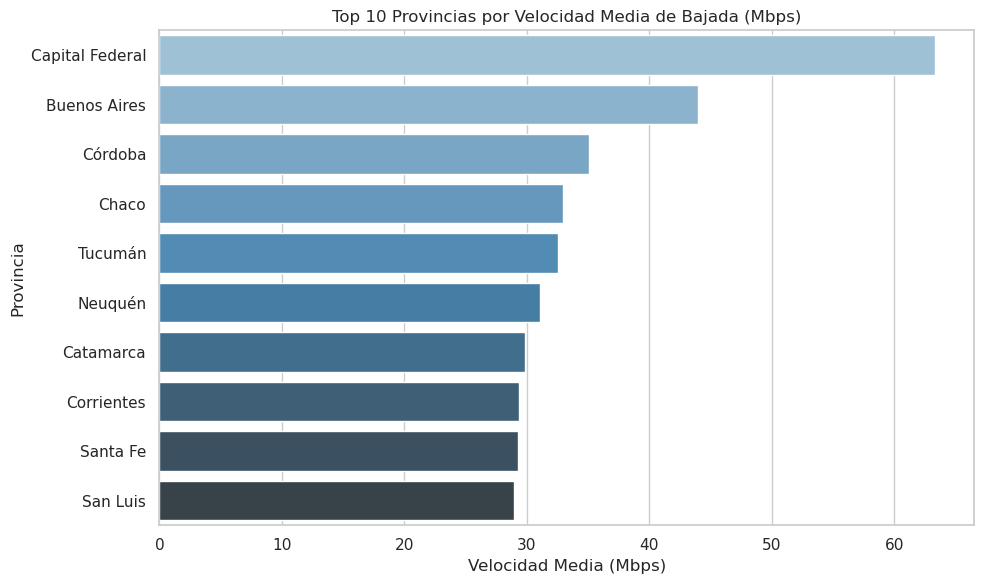

In [11]:
# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(
    data=velocidad_top10,
    y="Provincia",
    x="Mbps (Media de bajada)",
    palette="Blues_d",
    hue="Provincia",  # Se asigna `hue` explícitamente
    dodge=False,      # Evita desplazamiento
    legend=False      # Desactiva la leyenda
)

# Mejorar diseño del gráfico
plt.title("Top 10 Provincias por Velocidad Media de Bajada (Mbps)")
plt.xlabel("Velocidad Media (Mbps)")
plt.ylabel("Provincia")
plt.tight_layout()
plt.show()


Observaciones:

Liderazgo en velocidad:
Capital Federal y Buenos Aires destacan con las velocidades promedio más altas en comparación con otras provincias, lo que podría reflejar una mejor infraestructura tecnológica en estas áreas.

Disparidades regionales:
Las provincias con velocidades más bajas en el top 10, como San Luis y Santa Fe, aún presentan una brecha significativa frente a las líderes.

Representación geográfica:
La mayoría de las provincias incluidas parecen ubicarse en regiones más urbanizadas o con mayor densidad de población, lo que sugiere una correlación entre infraestructura y velocidad de bajada.

# Velocidad promedio por provincia
Analizar cómo varía la velocidad promedio por región utilizando un gráfico de barras.

Promedio Nacional de Velocidad Media de Bajada: 24.72 Mbps


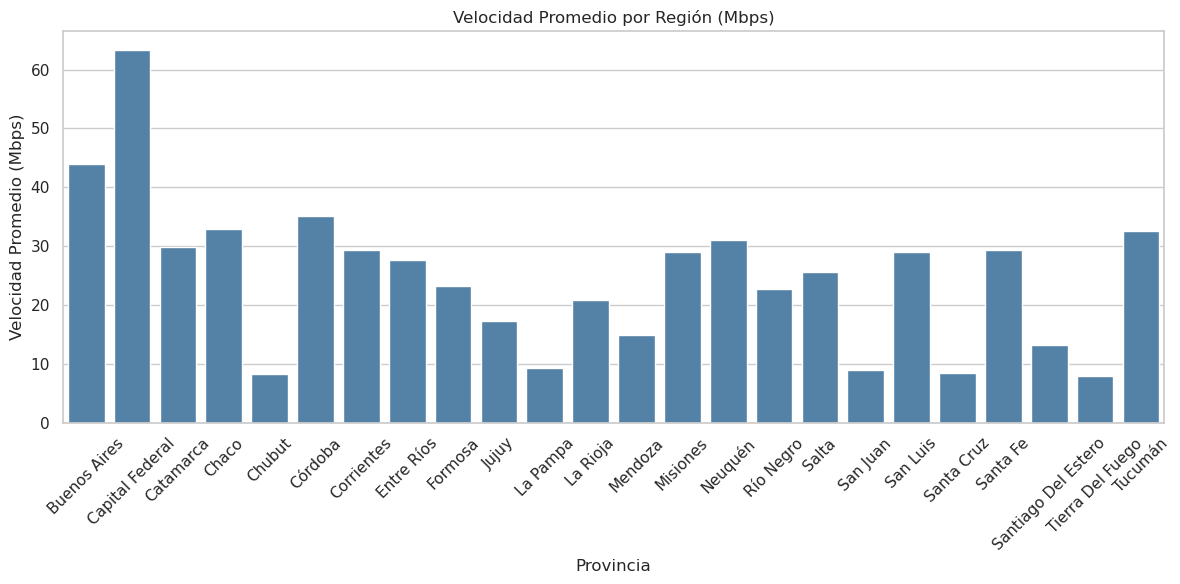

In [16]:
# Promedio nacional de velocidad media
promedio_nacional = velocidad_por_provincia["Mbps (Media de bajada)"].mean()
print(f"Promedio Nacional de Velocidad Media de Bajada: {promedio_nacional:.2f} Mbps")

# Gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar tamaño del gráfico
sns.barplot(
    data=velocidad_por_provincia,
    x='Provincia',  
    y='Mbps (Media de bajada)', 
    errorbar=None,  # Evita barras de error si no son necesarias
    color='steelblue'  # Usar un color sólido en lugar de palette para evitar conflictos
)
plt.title('Velocidad Promedio por Región (Mbps)')
plt.xlabel('Provincia')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.xticks(rotation=45)
plt.tight_layout()  # Mejora el ajuste del gráfico para evitar solapamientos
plt.show()


Análisis:
El gráfico de barras ilustra la velocidad promedio de internet por provincia en Argentina, representando claramente las diferencias entre las regiones.

Observaciones: 

Desigualdad Regional:
La velocidad promedio de internet varía notablemente entre provincias.
Esta desigualdad podría reflejar diferencias en inversión, infraestructura o demanda regional.

Provincias con Mayor Velocidad:
Las provincias con velocidades más altas suelen ser aquellas más urbanizadas, como Capital Federal y Buenos Aires, que tienen acceso a tecnologías más avanzadas y mayor densidad de usuarios.
Estas áreas son prioritarias para las inversiones en infraestructura de telecomunicaciones.

Provincias con Menor Velocidad:
Las provincias con las velocidades promedio más bajas tienden a estar ubicadas en regiones rurales o con menor desarrollo tecnológico, como Chubut.
Estas áreas pueden enfrentar desafíos como acceso limitado a tecnología de fibra óptica y menor retorno sobre la inversión para los proveedores.

Promedio Nacional:
La velocidad promedio nacional sirve como referencia para identificar cuáles provincias están significativamente por encima o por debajo de esta línea base.

Inversiones Estratégicas:
Identificar las provincias con velocidades más bajas para analizar la viabilidad de inversiones que mejoren la infraestructura.
Priorizar áreas urbanas emergentes con demanda creciente de servicios.

Planificación de Mercado:
Diseñar campañas específicas en regiones con menor velocidad para promover soluciones como servicios satelitales o planes básicos adaptados a estas áreas.

Desafíos y Oportunidades:
Las provincias con baja velocidad representan tanto un reto de inversión como una oportunidad para ampliar la cobertura de mercado y cerrar brechas digitales.

# Identificación de disparidades entre provincias
Se utiliza un boxplot para detectar posibles disparidades significativas en las velocidades promedio de descarga.

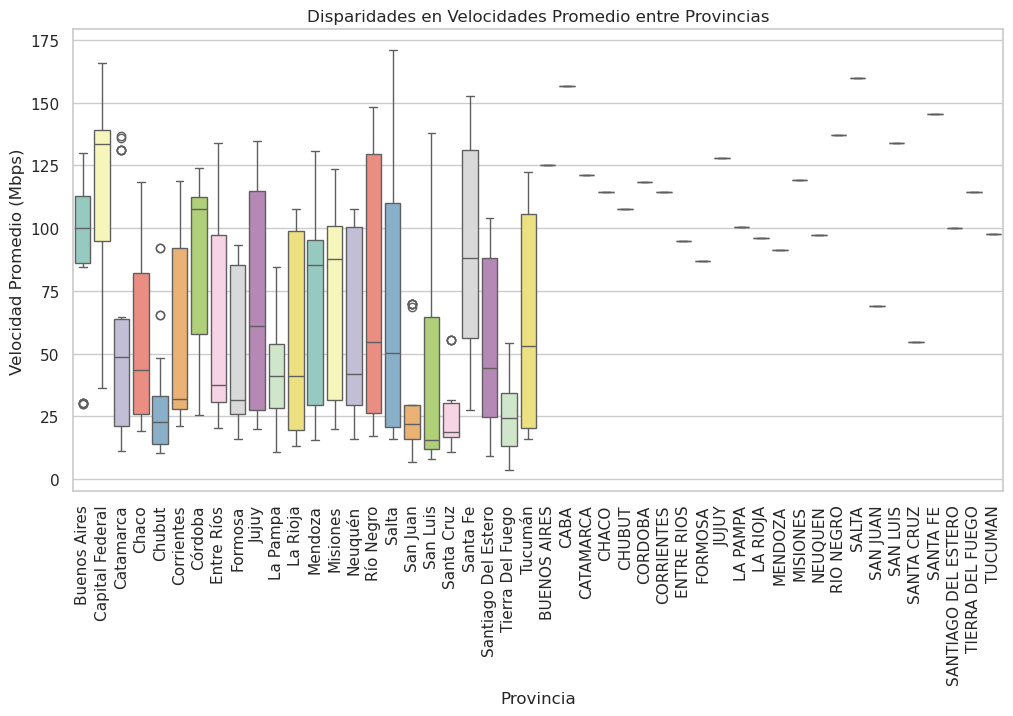

In [21]:
# Boxplot para identificar disparidades con palette y hue fijo
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=velocidad_sin_rangos,
    x="provincia",
    y="velocidad_promedio",
    hue="provincia",  # Asignar hue para evitar el FutureWarning
    palette="Set3",   # Se mantiene la paleta de colores
    dodge=False       # Para que hue no genere desplazamiento
)
plt.xticks(rotation=90)
plt.title("Disparidades en Velocidades Promedio entre Provincias")
plt.ylabel("Velocidad Promedio (Mbps)")
plt.xlabel("Provincia")
plt.legend([], [], frameon=False)  # Ocultar leyenda innecesaria
plt.show()


Observaciones:

Disparidad Regional Significativa:
Las diferencias en la altura de las cajas y la posición de los bigotes reflejan la desigualdad en las velocidades de internet entre provincias.
Provincias urbanas como Capital Federal probablemente muestran distribuciones más ajustadas (cajas pequeñas) debido a una conectividad más consistente y avanzada.

Presencia de Outliers:
Los outliers pueden ser áreas rurales con conexiones deficientes o zonas urbanas con acceso a conexiones de alta velocidad, como fibra óptica.
También podrían representar inconsistencias en la recolección de datos.

Distribuciones Provinciales:
Provincias con cajas más anchas tienen mayor dispersión en las velocidades, lo que podría sugerir diferencias significativas entre zonas rurales y urbanas dentro de esas provincias.
Distribuciones sesgadas (cajas desbalanceadas) podrían indicar que la mayoría de la población accede a velocidades similares, pero una pequeña proporción tiene experiencias extremas (muy rápidas o lentas).

Conclusiones:

Confirmación de Desigualdad:
Este análisis refuerza la conclusión de que la infraestructura de internet no está distribuida equitativamente en Argentina.

Foco en los Outliers:
Investigar los outliers puede revelar:
Casos de implementación de tecnología avanzada (como redes 5G o fibra óptica en áreas específicas).
Regiones con problemas críticos de infraestructura.

Desigualdad Intradistrital:
Provincias con mayor dispersión pueden beneficiarse de políticas más localizadas, enfocadas en reducir la brecha entre áreas rurales y urbanas.


Filtrar Outliers

Los outliers se detectan comparando los valores con el rango intercuartílico (IQR), una métrica común para identificar valores extremos.

In [22]:
# Calcular Q1, Q3 e IQR
q1 = velocidad_sin_rangos['velocidad_promedio'].quantile(0.25)
q3 = velocidad_sin_rangos['velocidad_promedio'].quantile(0.75)
iqr = q3 - q1

# Calcular los límites inferior y superior
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtrar outliers
outliers = velocidad_sin_rangos[
    (velocidad_sin_rangos['velocidad_promedio'] < limite_inferior) |
    (velocidad_sin_rangos['velocidad_promedio'] > limite_superior)
]

# Filtrar datos sin outliers
datos_sin_outliers = velocidad_sin_rangos[
    (velocidad_sin_rangos['velocidad_promedio'] >= limite_inferior) &
    (velocidad_sin_rangos['velocidad_promedio'] <= limite_superior)
]

print(f"Cantidad de outliers detectados: {len(outliers)}")


Cantidad de outliers detectados: 0


In [23]:
print(f"Q1 (percentil 25): {q1}")
print(f"Q3 (percentil 75): {q3}")
print(f"IQR: {iqr}")
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")


Q1 (percentil 25): 24.53665217391304
Q3 (percentil 75): 100.80437037037036
IQR: 76.26771819645732
Límite inferior: -89.86492512077294
Límite superior: 215.20594766505633


no se detectaron outliers en los datos: todos los valores de velocidad_promedio están dentro del rango permitido.

In [24]:
valor_minimo = velocidad_sin_rangos['velocidad_promedio'].min()
valor_maximo = velocidad_sin_rangos['velocidad_promedio'].max()

print(f"Velocidad mínima: {valor_minimo} Mbps")
print(f"Velocidad máxima: {valor_maximo} Mbps")


Velocidad mínima: 3.463111111111111 Mbps
Velocidad máxima: 170.78582352941177 Mbps


Conclusión
No hay outliers según el IQR, y los valores extremos observados en el dataset parecen razonables para velocidades de conexión.
Las velocidades reflejan un rango lógico, ya que el mínimo es 3.46 Mbps (esperado en áreas rurales o menos desarrolladas) y el máximo es 170.79 Mbps (esperado en áreas urbanas con mayor infraestructura).

Ahora se analiza la siguiente area clave:

# 1.3 Tecnologías de Conexión

Objetivo: Analizar las tecnologías dominantes y su evolución.
Hojas relevantes:
- Accesos_tecnologia_localidad
- Totales Accesos Por Tecnología
- Accesos Por Tecnología

Preguntas clave:
¿Qué tecnologías de conexión son las más utilizadas?
¿Cómo ha cambiado el uso de tecnologías como fibra óptica o ADSL a lo largo del tiempo?
¿Qué provincias tienen mayor adopción de tecnologías modernas?

# Carga de los datos

In [4]:
# Carga los archivos CSV en DataFrames
accesos_tecnologia_localidad = pd.read_csv("Accesos_tecnologia_localidad_limpio.csv")
totales_accesos_por_tecnologia = pd.read_csv("Totales_Accesos_Por_Tecnologia_limpio.csv")
accesos_por_tecnologia = pd.read_csv("Accesos_Por_Tecnologia_limpio.csv")

# Visualización rápida de los datos
print(accesos_tecnologia_localidad.head())
print(totales_accesos_por_tecnologia.head())
print(accesos_por_tecnologia.head())

      Provincia     Partido   Localidad    Tecnologia Link Indec  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          ADSL    6854100    755.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo    CABLEMODEM    6854100   4600.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo  FIBRA OPTICA    6854100      2.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo     SATELITAL    6854100    742.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo      WIRELESS    6854100    727.0
    Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2024          2   733491     5867504       4169958    593197  191957   
1  2024          1   774475     5986957       4015101    598682  257941   
2  2023          4   836390     6022532       3908183    585760  194796   
3  2023          3   897895     6018832       3708718    581436  200027   
4  2023          2  1006509     5997149       3463988    581823  202428   

      Total        Periodo  Total Correcto  
0  11556107   Abr-Jun 2024            True  
1  11633156   E

# Análisis de las Tecnologías Más Utilizadas
Objetivo: Identificar qué tecnologías dominan actualmente

Este análisis se basa en el archivo Totales Accesos Por Tecnología, que resume los accesos por tecnología

In [9]:
# Verificar nombres de columnas
print(totales_accesos_por_tecnologia.columns)

Index(['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total', 'Periodo', 'Total Correcto'],
      dtype='object')


# Identificar las tecnologías dominantes

In [10]:
# Seleccionamos las columnas correspondientes a las tecnologías
columnas_tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Sumamos los valores de cada tecnología
totales_tecnologia = totales_accesos_por_tecnologia[columnas_tecnologias].sum().sort_values(ascending=False)

# Mostramos los resultados
print(totales_tecnologia)


Cablemodem      186224052
ADSL            113183442
Fibra óptica     51437130
Wireless         12780315
Otros             6643815
dtype: int64


Los resultados indican que Cablemodem es la tecnología dominante con una amplia diferencia en el total de accesos acumulados, seguida por ADSL y Fibra óptica. Wireless y Otros tienen valores significativamente menores.

Interpretación del análisis

Dominancia de Cablemodem:
Representa la mayor proporción de accesos con 186 millones, lo que refleja su popularidad y disponibilidad.

ADSL como segunda opción:
Aunque sigue siendo relevante con 113 millones, su uso podría estar decreciendo en favor de tecnologías más modernas como Fibra óptica.

Fibra óptica en crecimiento:
Con 51 millones, muestra un incremento de adopción, especialmente en áreas urbanas o regiones con mayores inversiones tecnológicas.

Wireless y Otros:
Estas tecnologías representan una proporción menor, posiblemente enfocadas en zonas rurales o de difícil acceso.

# Evolución del Uso de Tecnologías
Objetivo: Analizar los cambios en el tiempo


In [11]:
# Sumamos por tecnología y periodo (año-trimestre)
tendencias = totales_accesos_por_tecnologia.groupby(['Año', 'Trimestre'])[columnas_tecnologias].sum()
print(tendencias)

                   ADSL  Cablemodem  Fibra óptica  Wireless   Otros
Año  Trimestre                                                     
2014 1          3697066     2407330        150323     70749   72930
     2          3708882     2461670        149363     72405   72148
     3          3714764     2569868        155494     85096   70049
     4          3764038     2536219        149682     76984   71573
2015 1          3756153     2668248        168188     79098   66045
     2          3767821     2756294        150839     82077   59157
     3          3788696     2840203        162663     84530   58976
     4          3803024     2898226        139187     85726   58668
2016 1          3792493     2806359        164371     85370   58763
     2          3782085     3035272        167788     85452   59482
     3          3776442     3124855        169898     81455   54300
     4          3722794     3210602        178070     85119   55088
2017 1          3708898     3276251        18014

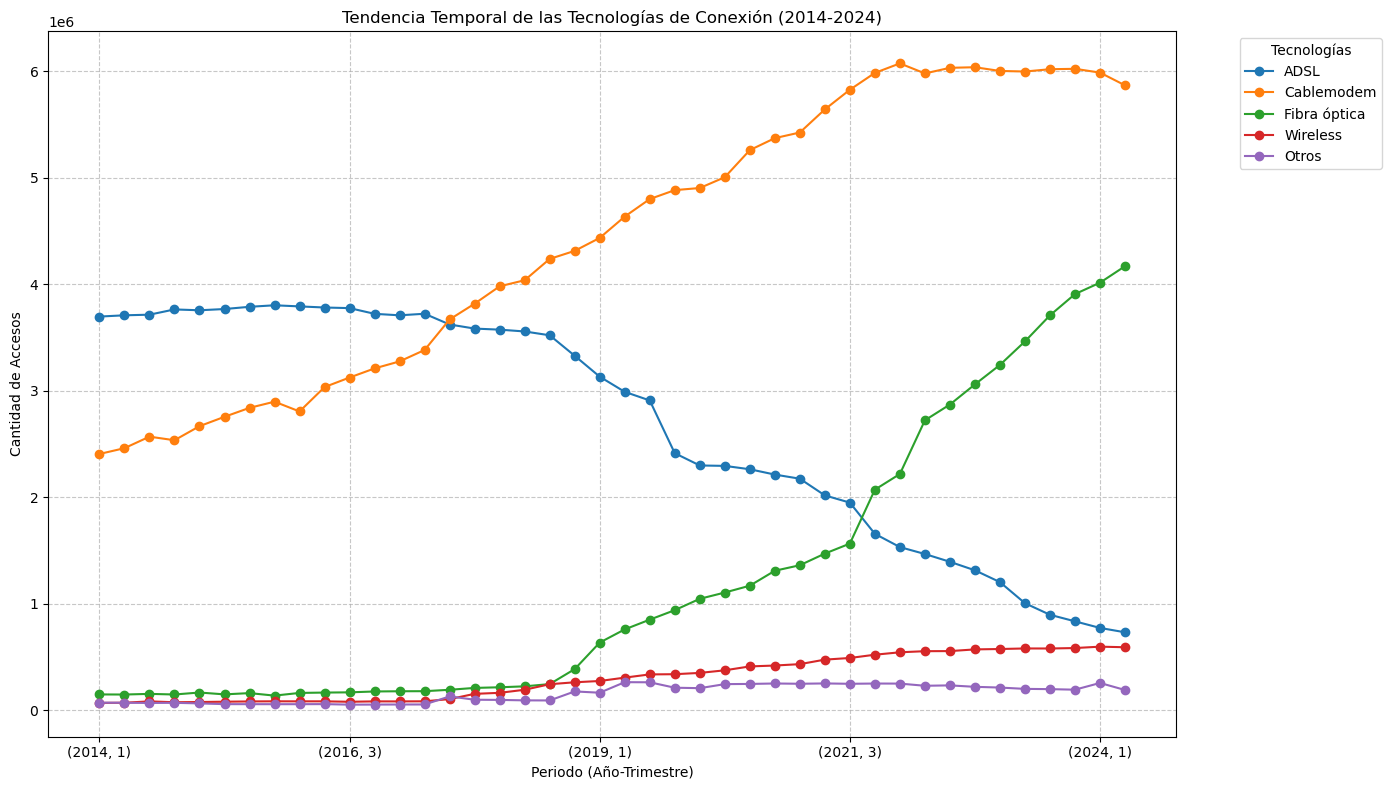

In [14]:
# Configuración del gráfico
tendencias.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Tendencia Temporal de las Tecnologías de Conexión (2014-2024)')
plt.xlabel('Periodo (Año-Trimestre)')
plt.ylabel('Cantidad de Accesos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tecnologías', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar gráfico
plt.show()


Análisis Temporal de las Tecnologías

ADSL:
Tendencia decreciente:
Desde 2014, con más de 3.7 millones de accesos en el primer trimestre, los números disminuyen drásticamente hasta 774,475 accesos en 2024 Q1.
Este declive coincide con el auge de tecnologías más modernas como Fibra óptica.

Cablemodem:
Crecimiento inicial, estabilización reciente:
De 2.4 millones en 2014 Q1 a un pico de 6.0 millones en 2023 Q4, consolidándose como la tecnología dominante.
A partir de 2024, muestra signos de estabilización o leve retroceso.

Fibra Óptica:
Crecimiento explosivo:
De 150,323 accesos en 2014 Q1 a 4.1 millones en 2024 Q2.
Esto refleja una transición hacia tecnologías de mayor capacidad y velocidad, especialmente en zonas urbanas.

Wireless:
Crecimiento moderado:
Desde 70,749 accesos en 2014 Q1 hasta 598,682 en 2024 Q1, aunque sigue siendo minoritario en comparación con otras tecnologías.

Otros:
Fluctuaciones sin tendencia clara:
Se mantiene por debajo de otras tecnologías, con una ligera disminución desde 72,930 accesos en 2014 Q1 a 257,941 en 2024 Q1.

# Adopción de Tecnologías Modernas por Provincia
Objetivo: Identificar qué provincias lideran en tecnologías modernas

In [59]:
print(accesos_tecnologia_localidad.columns)


Index(['Provincia', 'Partido', 'Localidad', 'Tecnologia', 'Link Indec',
       'Accesos'],
      dtype='object')


In [ ]:
# Sumar accesos por provincia y tecnología
accesos_provincia_tecnologia = accesos_tecnologia_localidad.groupby(['Provincia', 'Tecnologia'])['Accesos'].sum().unstack()
print(accesos_provincia_tecnologia)


Tecnologia               ADSL  CABLEMODEM  Cablemodem  DIAL UP  FIBRA OPTICA  \
Provincia                                                                      
BUENOS AIRES         214055.0   2519875.0    202591.0   5900.0     1849476.0   
CABA                  54102.0   1144781.0         NaN   2050.0      230402.0   
CATAMARCA              4951.0     10303.0         NaN      1.0       58355.0   
CHACO                  9448.0     57935.0         NaN      5.0       68944.0   
CHUBUT                25955.0     80704.0         NaN    857.0       26516.0   
CORDOBA               93483.0    443091.0         NaN     63.0      477504.0   
CORRIENTES            14849.0     86226.0         NaN      3.0       39792.0   
ENTRE RIOS            31335.0    158918.0         NaN     20.0       68540.0   
FORMOSA                8488.0     18768.0         NaN      NaN       18977.0   
JUJUY                  9509.0     51361.0         NaN      NaN       53492.0   
LA PAMPA               6778.0     58647.

In [61]:
# Normalizar nombres de columnas para unificar variantes
accesos_provincia_tecnologia.columns = accesos_provincia_tecnologia.columns.str.strip().str.lower()

# Agrupar y consolidar variantes de nombres
accesos_provincia_tecnologia = accesos_provincia_tecnologia.T.groupby(
    lambda col: col.replace(" ", "").replace("ó", "o")  # Elimina espacios y normaliza caracteres especiales
).sum().T

# Recalcular totales nuevamente
accesos_provincia_tecnologia_agrupado = accesos_provincia_tecnologia.sum(axis=0)
print(accesos_provincia_tecnologia_agrupado)


Tecnologia
adsl            733491.0
cablemodem     5867504.0
dialup           11793.0
fibraoptica    4169958.0
otros           174996.0
satelital         2930.0
wimax             2238.0
wireless        593197.0
dtype: float64


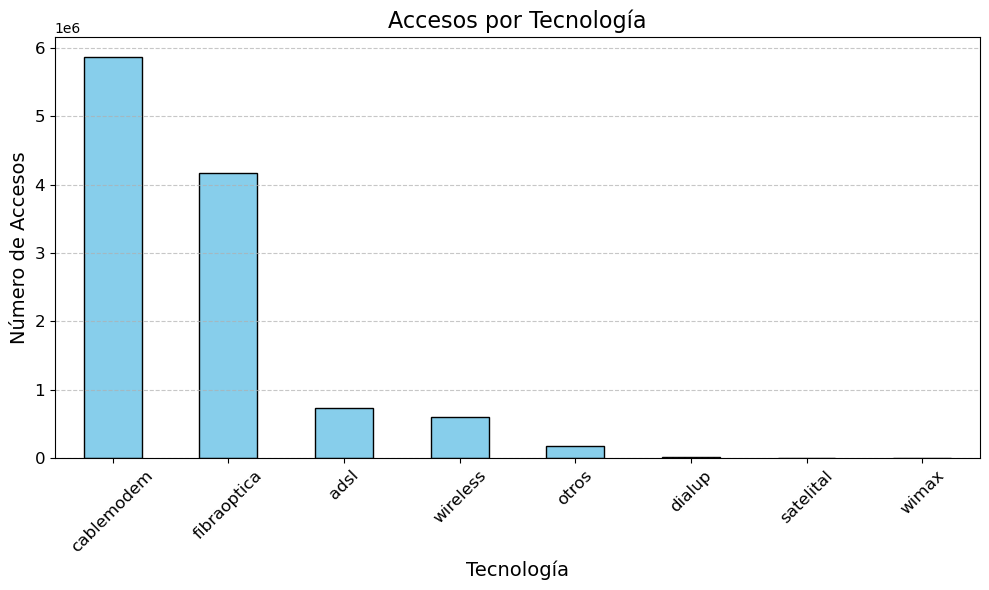

In [ ]:
# Datos de ejemplo: reemplazar 'accesos_provincia_tecnologia_agrupado' si se usa otro DataFrame o Serie
data = accesos_provincia_tecnologia_agrupado

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
data.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Accesos por Tecnología', fontsize=16)
plt.ylabel('Número de Accesos', fontsize=14)
plt.xlabel('Tecnología', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Análisis:

Dominancia de tecnologías modernas:

Cablemodem es claramente la tecnología más utilizada, con una cantidad de accesos que supera ampliamente al resto. Esto sugiere que es una opción preferida por los usuarios debido a su disponibilidad, rendimiento o costo.

Fibra óptica es la segunda tecnología con mayor número de accesos. Su crecimiento puede estar relacionado con la expansión de esta tecnología en áreas urbanas y su mayor capacidad de ancho de banda.


Declive de tecnologías antiguas:

ADSL tiene una menor cantidad de accesos, lo que podría indicar un declive a medida que los usuarios migran hacia opciones más modernas como el cablemodem y la fibra óptica.

Dial-up tiene cifras casi insignificantes, lo que es consistente con el abandono de esta tecnología obsoleta.
Tecnologías inalámbricas y alternativas:

Wireless tiene una cantidad moderada de accesos, lo que sugiere que sigue siendo una opción viable en áreas rurales o con menor infraestructura de conexión.

Otras tecnologías (como satelital y WiMAX) tienen un uso marginal, lo que indica que solo se utilizan en nichos muy específicos, posiblemente en zonas remotas o con condiciones particulares.


Evolución esperada:
Dado el dominio de cablemodem y el fuerte crecimiento de fibra óptica, es probable que las tecnologías más antiguas como ADSL y dial-up sigan perdiendo relevancia en los próximos años.
Las tecnologías inalámbricas podrían mantenerse en áreas de difícil acceso donde las alternativas cableadas no sean viables.